In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-29 12:09:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.7MB/s    in 5.7s    

2023-05-29 12:09:19 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
zip_data = zipfile.ZipFile("pizza_steak.zip","r")
zip_data.extractall()
zip_data.close()

In [ ]:
! ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train

pizza  steak


In [ ]:
! ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(dirpath ,dirnames, len(filenames))

pizza_steak ['test', 'train'] 0
pizza_steak/test ['steak', 'pizza'] 0
pizza_steak/test/steak [] 250
pizza_steak/test/pizza [] 250
pizza_steak/train ['steak', 'pizza'] 0
pizza_steak/train/steak [] 750
pizza_steak/train/pizza [] 750


In [ ]:
len(os.listdir("pizza_steak/train/pizza"))



750

In [ ]:
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def image_view(dir_name,food_name):
  image_random = random.sample(os.listdir(dir_name+food_name),1)
  image = mpimg.imread(dir_name+food_name+"/"+image_random[0])
  plt.imshow(image)
  return image

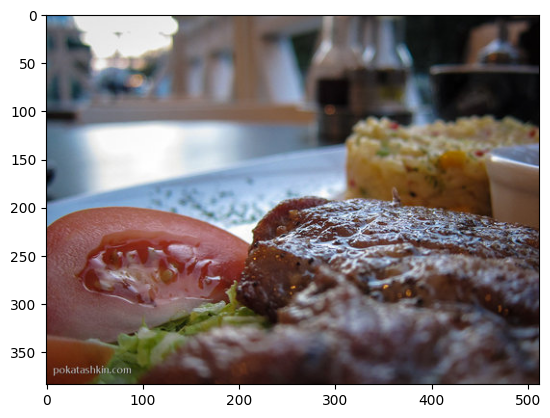

In [ ]:
image = image_view(dir_name="pizza_steak/train/",
           food_name="steak")

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
image/255

array([[[0.85098039, 0.80784314, 0.72941176],
        [0.83529412, 0.79215686, 0.71372549],
        [0.82352941, 0.78039216, 0.70196078],
        ...,
        [0.89019608, 0.87058824, 0.85490196],
        [0.88627451, 0.86666667, 0.85098039],
        [0.9372549 , 0.91764706, 0.90196078]],

       [[0.85882353, 0.81568627, 0.7372549 ],
        [0.83529412, 0.79215686, 0.71372549],
        [0.81176471, 0.76862745, 0.69803922],
        ...,
        [0.8745098 , 0.85490196, 0.83921569],
        [0.86666667, 0.84705882, 0.83137255],
        [0.88627451, 0.86666667, 0.85098039]],

       [[0.83529412, 0.79215686, 0.72156863],
        [0.89019608, 0.84705882, 0.77647059],
        [0.92156863, 0.89019608, 0.81568627],
        ...,
        [0.85098039, 0.83137255, 0.81568627],
        [0.87058824, 0.85098039, 0.83529412],
        [0.89411765, 0.8745098 , 0.85882353]],

       ...,

       [[0.94117647, 0.91372549, 0.8745098 ],
        [0.9372549 , 0.90980392, 0.87058824],
        [0.93333333, 0

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

In [ ]:
train_data_generator = ImageDataGenerator(rescale=1/255)
valid_data_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
train_data = train_data_generator.flow_from_directory(train_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary",
                                                      seed=42)

valid_data = valid_data_generator.flow_from_directory(test_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary",
                                                      seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**model_1 :simple_neural_network**

In [ ]:

import tensorflow as tf 
from tensorflow.keras import layers
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(224,224,3)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    
    
])

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_trained = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 215ms/step - loss: 0.6502 - accuracy: 0.6040 - val_loss: 0.5946 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5839 - accuracy: 0.7447 - val_loss: 0.5703 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.5635 - accuracy: 0.7667 - val_loss: 0.5654 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5703 - accuracy: 0.7413 - val_loss: 0.5457 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.5360 - accuracy: 0.7780 - val_loss: 0.5309 - val_accuracy: 0.7680


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


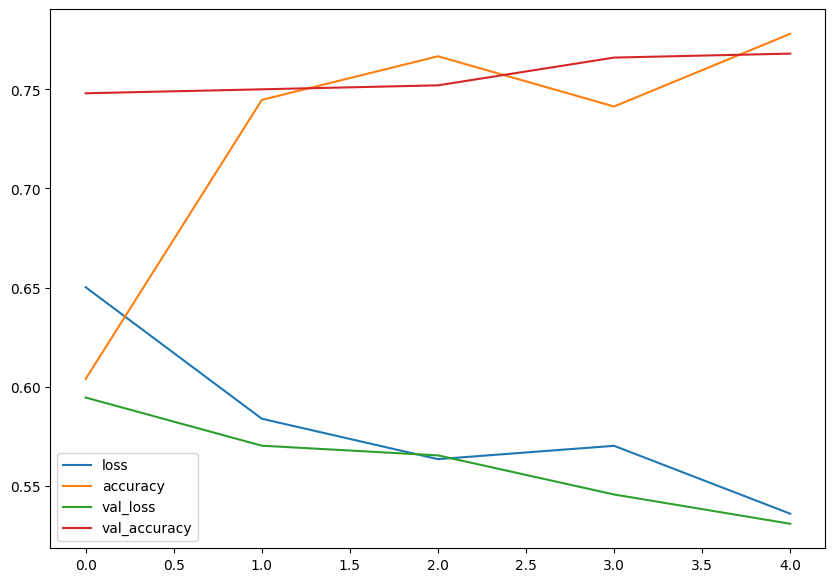

In [ ]:
import pandas as pd
pd.DataFrame(model_1_trained.history).plot(figsize=(10,7));

according plot we can see our model is under fiting and need to learn more beacuse val_loss change and decrease less and accuracy doesn't increase during training in val_data and model_1 does not have good perfomance. we should build complicated model.


**model_2 : same as model_1 with more dense and nurons**

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape=(224,224,3)),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    
    
])

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_trained = model_2.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 198ms/step - loss: 2.7952 - accuracy: 0.6333 - val_loss: 1.3389 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.9650 - accuracy: 0.7113 - val_loss: 0.5580 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6333 - accuracy: 0.7293 - val_loss: 0.4510 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.8153 - accuracy: 0.7027 - val_loss: 1.0982 - val_accuracy: 0.6220
Epoch 5/5
47/47 [==============================] - 12s 257ms/step - loss: 0.5991 - accuracy: 0.7767 - val_loss: 0.4396 - val_accuracy: 0.7880


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


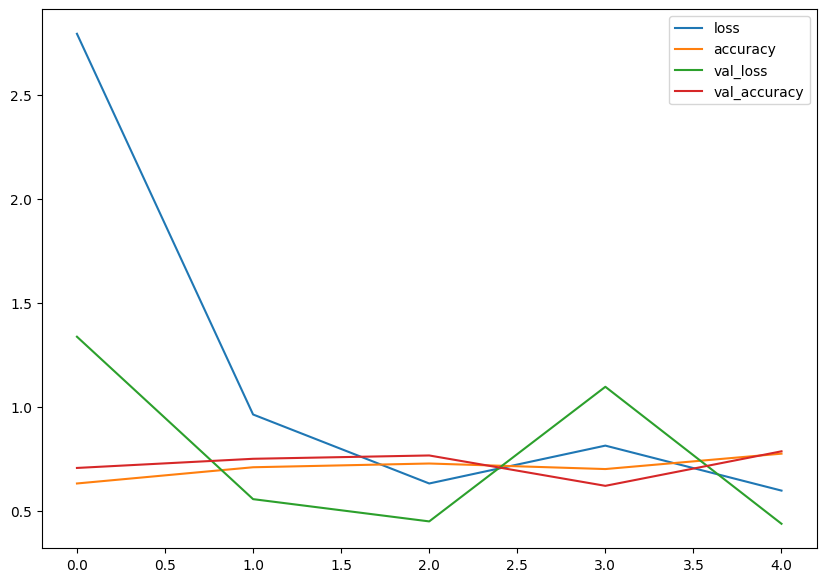

In [ ]:
pd.DataFrame(model_2_trained.history).plot(figsize=(10,7));

according trainable params at summary we can see our model is overfiting and learn a lot of params and according plot our model doesn't have good perfomanace.

**model_3:Con2D** 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model_3 = tf.keras.Sequential([
    layers.Conv2D(filters=10, 
                 kernel_size=3,
                 strides=1,
                 padding="valid",
                 activation="relu",
                 input_shape=(224,224,3),),
    layers.MaxPool2D(pool_size=2),             
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1,activation="sigmoid")

])

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_trained = model_3.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 240ms/step - loss: 0.6412 - accuracy: 0.6040 - val_loss: 0.5158 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4710 - accuracy: 0.7873 - val_loss: 0.4111 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4235 - accuracy: 0.8107 - val_loss: 0.3697 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3928 - accuracy: 0.8393 - val_loss: 0.3414 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3839 - accuracy: 0.8387 - val_loss: 0.3131 - val_accuracy: 0.8660


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

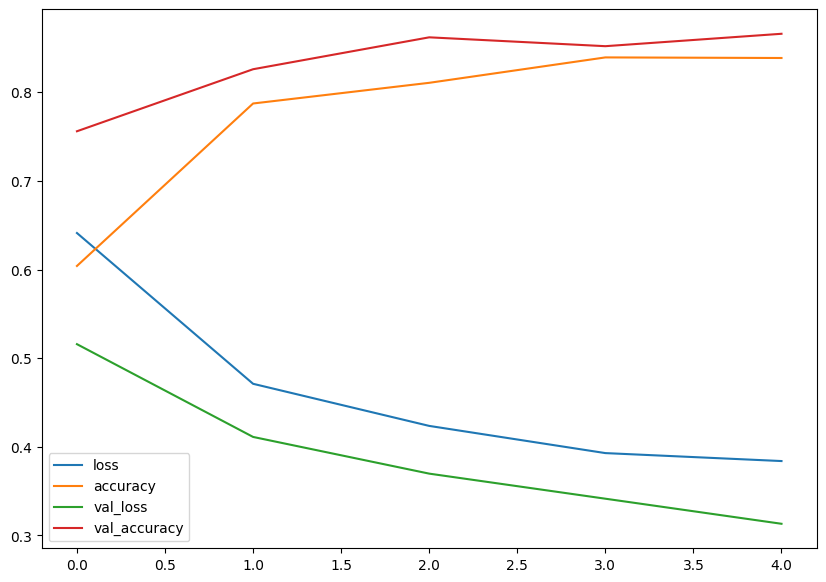

In [ ]:
import pandas as pd
pd.DataFrame(model_3_trained.history).plot(figsize=(10,7));

according plot we can see our model improved but at the end  val_loss curve increase during training and val_accurecy curve decrease, it means our model is overfiting and learn more

**model_4: Con2D with data augmented**

In [ ]:
train_data_generator_augment = ImageDataGenerator(rescale=1/255,
                                                  rotation_range=20,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  width_shift_range=.2,
                                                  height_shift_range=0.2,
                                                  horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data_augment = train_data_generator_augment. flow_from_directory(train_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary",
                                                      shuffle=True)
test_data_generator = test_data_generator. flow_from_directory(test_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary"
                                                      )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_4 = tf.keras.Sequential([
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(pool_size=2),             
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4_trained = model_4.fit(train_data_augment,
                              epochs=5,
                              steps_per_epoch=len(train_data_augment),
                              validation_data=test_data_generator,
                              validation_steps=len(test_data_generator))

Epoch 1/5
47/47 [==============================] - 26s 517ms/step - loss: 0.6587 - accuracy: 0.6320 - val_loss: 0.4729 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5071 - accuracy: 0.7520 - val_loss: 0.5309 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 24s 519ms/step - loss: 0.4894 - accuracy: 0.7780 - val_loss: 0.3592 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 24s 509ms/step - loss: 0.4597 - accuracy: 0.7907 - val_loss: 0.3233 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 24s 518ms/step - loss: 0.4901 - accuracy: 0.7640 - val_loss: 0.3466 - val_accuracy: 0.8520


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 10)  

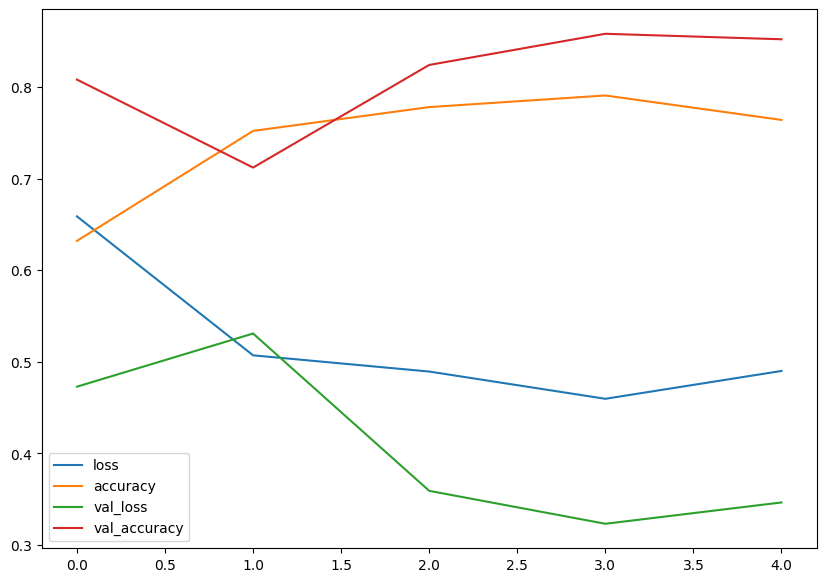

In [ ]:
pd.DataFrame(model_4_trained.history).plot(figsize=(10,7));

finally we have acceptable model with good performance and accurecy


In [ ]:
model_1.save("model_2_SavedModel_format")

In [ ]:
model_2.save("model_2_SavefModel_format")

In [ ]:
model_3.save("model_3_SavedModel_format")

In [ ]:
model_4.save("model_4_SavedModel_format")

NameError: ignored

**make prediction**






In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 


--2023-05-29 12:04:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-05-29 12:04:01 (147 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



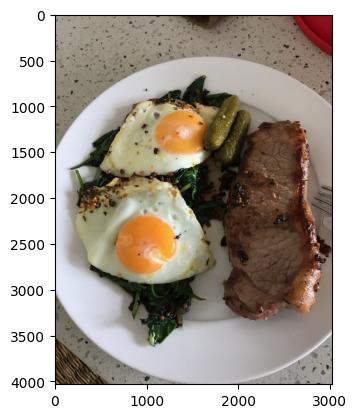

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("03-steak.jpeg")
plt.imshow(image)

In [ ]:
image.shape

(4032, 3024, 3)

In [33]:
def prep_custom_img(filename):
  image = tf.io.read_file(filename)
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.resize(image, size = [224,224])
  image = image/255.
  image = tf.expand_dims(image,axis=0)
  return image

In [ ]:
image = prep_custom_img("03-steak.jpeg")
image

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [36]:
loaded_model_4 = tf.keras.models.load_model("model_4_SavedModel_format")

OSError: ignored

In [ ]:
pred_image = model_4.predict(image)
pred_image

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
pred_image_int = tf.round(pred_image)
pred_image_int

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

**multi_class classification:10 class foods**

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-05-30 10:30:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  30.1MB/s    in 17s     

2023-05-30 10:31:11 (28.4 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [4]:
import zipfile
all_data = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
all_data.extractall()
all_data.close()

In [5]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(dirpath,dirnames,len(filenames))

10_food_classes_all_data ['test', 'train'] 0
10_food_classes_all_data/test ['hamburger', 'chicken_wings', 'ice_cream', 'sushi', 'fried_rice', 'chicken_curry', 'ramen', 'steak', 'pizza', 'grilled_salmon'] 0
10_food_classes_all_data/test/hamburger [] 250
10_food_classes_all_data/test/chicken_wings [] 250
10_food_classes_all_data/test/ice_cream [] 250
10_food_classes_all_data/test/sushi [] 250
10_food_classes_all_data/test/fried_rice [] 250
10_food_classes_all_data/test/chicken_curry [] 250
10_food_classes_all_data/test/ramen [] 250
10_food_classes_all_data/test/steak [] 250
10_food_classes_all_data/test/pizza [] 250
10_food_classes_all_data/test/grilled_salmon [] 250
10_food_classes_all_data/train ['hamburger', 'chicken_wings', 'ice_cream', 'sushi', 'fried_rice', 'chicken_curry', 'ramen', 'steak', 'pizza', 'grilled_salmon'] 0
10_food_classes_all_data/train/hamburger [] 750
10_food_classes_all_data/train/chicken_wings [] 750
10_food_classes_all_data/train/ice_cream [] 750
10_food_classes_

In [6]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_data_generator = ImageDataGenerator(rescale=1/255)
test_data_generator = ImageDataGenerator(rescale=1/255)
 
train_data = train_data_generator.flow_from_directory(train_dir,
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode="categorical")
test_data = test_data_generator.flow_from_directory(test_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
train_data[4][0].shape

(32, 224, 224, 3)

***mdel_5:CNN for multi classes foods***

In [8]:

model_5 = tf.keras.Sequential([
    layers.Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    layers.MaxPool2D(),             
    layers.Conv2D(10,3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10,activation="softmax")
])

In [9]:

model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [11]:
model_5_trained = model_5.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 256ms/step - loss: 0.4169 - accuracy: 0.8859 - val_loss: 2.7916 - val_accuracy: 0.2812
Epoch 2/5
235/235 [==============================] - 49s 210ms/step - loss: 0.2067 - accuracy: 0.9532 - val_loss: 3.2538 - val_accuracy: 0.2808
Epoch 3/5
235/235 [==============================] - 48s 204ms/step - loss: 0.0953 - accuracy: 0.9867 - val_loss: 3.6268 - val_accuracy: 0.2932
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 0.0386 - accuracy: 0.9983 - val_loss: 3.9913 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 47s 202ms/step - loss: 0.0165 - accuracy: 0.9995 - val_loss: 4.2144 - val_accuracy: 0.2988


In [12]:
model_5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 10)                2

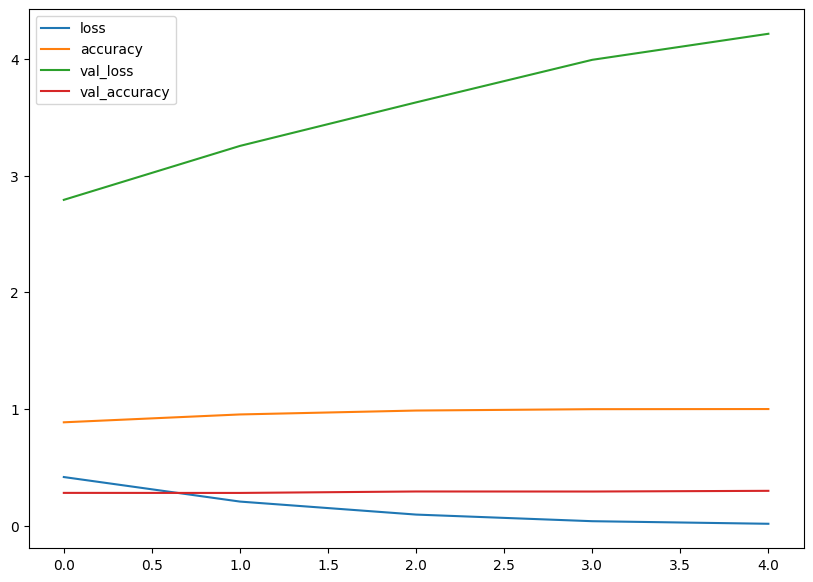

In [16]:
import pandas as pd 
pd.DataFrame(model_5_trained.history).plot(figsize=(10,7));

In [17]:
model_5.save("model_5_SavedModel_format")

**model_6:CNN with data augmented for multi classs foods**

In [18]:
train_data_generator_augment = ImageDataGenerator(rescale=1/255,
                                                  rotation_range=20,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1/255)
 
train_data_augment = train_data_generator_augment.flow_from_directory("10_food_classes_all_data/train/",
                                                      target_size=(224,224),
                                                      batch_size=32,
                                                      class_mode="categorical")
test_data = test_data_generator.flow_from_directory("10_food_classes_all_data/test/",
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [19]:
model_6 = tf.keras.models.clone_model(model_5)
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [21]:
model_6_trained = model_6.fit(train_data_augment,
                              epochs=5,
                              steps_per_epoch=len(train_data_augment),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 161s 679ms/step - loss: 2.2475 - accuracy: 0.1695 - val_loss: 2.1003 - val_accuracy: 0.2332
Epoch 2/5
235/235 [==============================] - 146s 622ms/step - loss: 2.1013 - accuracy: 0.2505 - val_loss: 1.9164 - val_accuracy: 0.3188
Epoch 3/5
235/235 [==============================] - 123s 523ms/step - loss: 2.0198 - accuracy: 0.2931 - val_loss: 1.8683 - val_accuracy: 0.3516
Epoch 4/5
235/235 [==============================] - 120s 513ms/step - loss: 1.9686 - accuracy: 0.3187 - val_loss: 1.8600 - val_accuracy: 0.3592
Epoch 5/5
235/235 [==============================] - 120s 510ms/step - loss: 1.9518 - accuracy: 0.3232 - val_loss: 1.7685 - val_accuracy: 0.3956


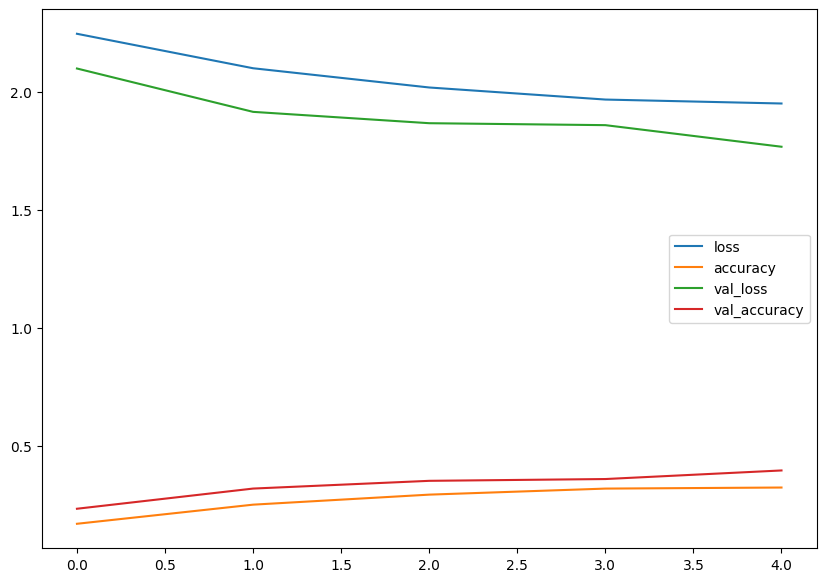

In [23]:
import pandas as pd 
pd.DataFrame(model_6_trained.history).plot(figsize=(10,7));

In [24]:
model_6.save("model_6_SavedModel_format")

**making prediction with costum images**

In [29]:
!wget -q  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

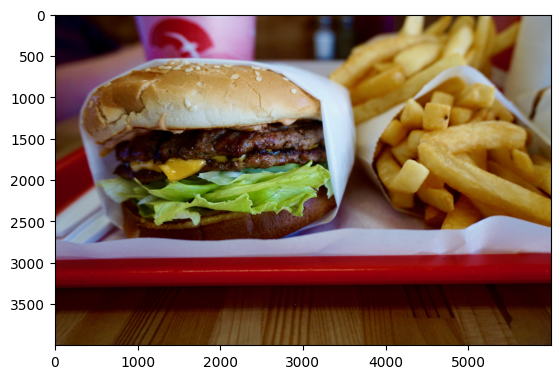

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("03-hamburger.jpeg")
plt.imshow(image)

In [37]:
image = prep_custom_img('03-hamburger.jpeg')

In [38]:
image.shape

TensorShape([1, 224, 224, 3])

In [43]:
pred_image = model_6.predict(image)
pred_image

1/1 [==============================] - 0s 51ms/step


array([[0.05326302, 0.03667022, 0.06695742, 0.0683148 , 0.05529318,
        0.09278918, 0.19570673, 0.07186268, 0.18443573, 0.17470706]],
      dtype=float32)